# Reference
1. https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html

![hysteresis thresholding](https://docs.opencv.org/4.x/hysteresis.jpg)

> The edge A is above the maxVal, so considered as "sure-edge". Although edge C is below maxVal, it is connected to edge A, so that also considered as valid edge and we get that full curve. But edge B, although it is above minVal and is in same region as that of edge C, it is not connected to any "sure-edge", so that is discarded. So it is very important that we have to select minVal and maxVal accordingly to get the correct result.

> This stage also removes small pixels noises on the assumption that edges are long lines.

4.8.1
0.25ms


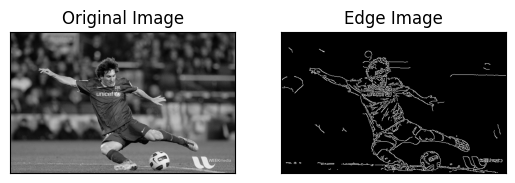

In [24]:
import time
import cv2 as cv
print(cv.getVersionString())
from matplotlib import pyplot as plt

start_time = time.time()
img = cv.imread('messi5.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img, 100, 200)
time_spent = time.time() - start_time
print('%.2fms' % (time_spent * 100))

plt.subplot(1,2,1)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(edges, cmap = 'gray')
plt.title('Edge Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [25]:
import cv2 as cv
print(cv.getVersionString())
import time

current_min_val = 100
current_max_val = 200

def on_min_val(val):
    global current_min_val
    current_min_val = val
    update_window(
        min_val=current_min_val,
        max_val=current_max_val,
    )

def on_max_val(val):
    global current_max_val
    current_max_val = val
    update_window(
        min_val=current_min_val,
        max_val=current_max_val,
    )

title_window = 'Canny Edge Detection'
cv.namedWindow(title_window)

def update_window(min_val, max_val):
    start_time = time.time()

    img = cv.imread('messi5.jpg', cv.IMREAD_GRAYSCALE)
    assert img is not None, "file could not be read, check with os.path.exists()"

    edges = cv.Canny(img, min_val, max_val)

    time_spent = time.time() - start_time

    font = cv.FONT_HERSHEY_COMPLEX
    cv.putText(edges, '%.2fms' % (time_spent * 100), (30, 30), font, 0.5, (255, 255, 255), 1)
    
    cv.imshow(title_window, edges)

cv.createTrackbar('minVal', title_window, current_min_val, 200, on_min_val)
cv.createTrackbar('maxVal', title_window, current_max_val, 300, on_max_val)

update_window(
    min_val=current_min_val,
    max_val=current_max_val,
)

cv.waitKey()

4.8.1
